### Anime Analytics

#### Conteúdo
> Este conjunto de dados que contém informações detalhadas de mais de 20 mil animes listados no myanimelist com as seguintes características:

* title: título do anime
* episodes: número de episódios
* status: se o anime ainda está sendo exibido ou se já terminou a exibição
* theme: o tema do anime
* demographic: o público-alvo do anime (por exemplo, shonen, shojo, seinen e josei)
* genres: gêneros do anime
* type: se o anime é uma série de TV, filme, etc.
* favorites: o número de usuários autenticados que marcaram o anime como favorito
* popularity: a classificação do anime com base no total de membros em comparação com outros animes
* rank: a classificação do anime com base na pontuação em comparação com outros animes
* score: a pontuação média de todos os usuários autenticados que fizeram uma votação pública sobre o anime
* members: número total de pessoas que adicionaram o anime à sua lista pessoal de animes (por exemplo, completado, assistindo, pausado, abandonado)
* synopsis: enredo do anime
* aired: quando o anime foi exibido
* duration: a duração do anime (por exemplo, duração por episódio)
* premiered: a temporada em que o anime foi exibido
* studio: o estúdio que produz o anime

In [253]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import normaltest
from scipy.stats import kstest
import plotly.express as px

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [254]:
# Importando Dataset
dados = pd.read_csv('dados/mal_anime.csv')

#### Análise Exploratória dos dados

In [255]:
dados.shape

(24262, 18)

In [256]:
dados.head()

,Unnamed: 0,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,"218,277",#3,#1,9.10,"3,190,961",After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24 min. per ep.,Spring 2009,Bones
1,1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,"183,596",#13,#2,9.07,"2,452,142",Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24 min. per ep.,Spring 2011,White Fox
2,2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,"18,421",#458,#3,9.06,"455,428",Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24 min. per ep.,Fall 2022,Pierrot
3,3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,"16,042",#332,#4,9.06,"599,235","Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24 min. per ep.,Spring 2015,Bandai Namco Pictures
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,"29,397",#193,#5,9.05,"832,346",The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23 min. per ep.,Spring 2022,A-1 Pictures


In [257]:
dados.dtypes

Unnamed: 0       int64
title           object
episodes        object
status          object
theme           object
demographic     object
genres          object
type            object
favorites       object
popularity      object
rank            object
score          float64
members         object
synopsis        object
aired           object
duration        object
premiered       object
studios         object
dtype: object

In [258]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24262 entries, 0 to 24261
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   24262 non-null  int64  
 1   title        24262 non-null  object 
 2   episodes     24262 non-null  object 
 3   status       24262 non-null  object 
 4   theme        24262 non-null  object 
 5   demographic  24262 non-null  object 
 6   genres       24262 non-null  object 
 7   type         24262 non-null  object 
 8   favorites    24262 non-null  object 
 9   popularity   24262 non-null  object 
 10  rank         20197 non-null  object 
 11  score        15294 non-null  float64
 12  members      24262 non-null  object 
 13  synopsis     24262 non-null  object 
 14  aired        24262 non-null  object 
 15  duration     24262 non-null  object 
 16  premiered    24262 non-null  object 
 17  studios      24262 non-null  object 
dtypes: float64(1), int64(1), object(16)
memory usa

In [259]:
# Removendo a "#" 
dados['rank'] = dados['rank'].str.lstrip('#')

In [260]:
# Removendo a "#"
dados['popularity'] = dados['popularity'].str.lstrip('#')

In [261]:
# Removendo ","
dados['members'] = dados['members'].str.replace(",",'')

In [262]:
# Removendo ","
dados['favorites'] = dados['favorites'].str.replace(",",'')

In [263]:
#Verificando dados unicos da variável Duration
print(dados['duration'].unique())

['24 min. per ep.' '23 min. per ep.' '1 hr. 1 min. per ep.'
 '1 hr. 44 min.' '26 min. per ep.' '2 hr. 10 min.' '25 min. per ep.'
 '1 hr. 50 min.' '2 hr. 20 min.' '22 min. per ep.' '30 min. per ep.'
 '1 hr. 36 min.' '1 hr. 46 min.' '1 hr. 23 min.' '2 hr. 4 min.'
 '29 min. per ep.' '24 min.' '2 hr. 2 min.' '2 hr. 13 min.'
 '1 hr. 59 min.' '1 hr. 45 min.' '1 hr. 56 min.' '2 hr. 41 min.'
 '2 hr. 35 min.' '1 hr. 30 min.' '47 min.' '1 hr. 57 min.' '1 hr. 4 min.'
 '2 hr. 5 min.' '1 hr. 48 min.' '1 hr. 26 min.' '1 hr. 21 min.' '2 hr.'
 '45 min.' '1 hr. 54 min.' '1 hr. 13 min.' '1 hr. 35 min.' '1 hr. 28 min.'
 '9 min.' '28 min. per ep.' '1 hr. 36 min. per ep.' '5 min. per ep.'
 '27 min. per ep.' '1 hr. 31 min.' '1 hr. 38 min.' '2 hr. 1 min.'
 '22 min.' '1 hr. 55 min.' '1 hr. 49 min.' '16 min. per ep.' '10 min.'
 '49 min. per ep.' '1 hr. 11 min. per ep.' '34 min.' '2 hr. 15 min.'
 '50 min. per ep.' '55 min.' '1 hr. 47 min.' '1 hr. 52 min.' '1 hr.'
 '11 min.' '1 hr. 42 min.' '1 hr. 32 min.' '1 hr

Precisamos normalizar os dados para minutos:

In [264]:
# Função para converter a duração para minutos
def duration_to_minutes(duration):
    if 'hr' in duration:
        hours = int(duration.split(' hr')[0])
    else:
        hours = 0

    if 'min' in duration:
        mins = int(duration.split(' min')[0].split()[-1]) # Tratar casos como '24 min. per ep.'
    else:
        mins = 0

    if 'sec' in duration:
        if 'per ep' in duration:
            seconds = int(duration.split(' sec. per ep.')[0].split()[-1]) # Tratar casos como '43 sec. per ep.'
        else:
            seconds = int(duration.split(' sec')[0].split()[-1]) # Tratar casos como '22 sec.'
    else:
        seconds = 0

    return hours * 60 + mins + seconds // 60

# Aplicar a função de conversão à coluna 'duration'
dados['duration'] = dados['duration'].apply(duration_to_minutes)


In [265]:
dados.head()

,Unnamed: 0,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,3,1,9.10,3190961,After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24,Spring 2009,Bones
1,1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,13,2,9.07,2452142,Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24,Spring 2011,White Fox
2,2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,458,3,9.06,455428,Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24,Fall 2022,Pierrot
3,3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,332,4,9.06,599235,"Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24,Spring 2015,Bandai Namco Pictures
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,193,5,9.05,832346,The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23,Spring 2022,A-1 Pictures


#### Verificando valores Ausentes, Variáveis Númericas

In [266]:
dados.isnull().sum()

Unnamed: 0        0
title             0
episodes          0
status            0
theme             0
demographic       0
genres            0
type              0
favorites         0
popularity        0
rank           4065
score          8968
members           0
synopsis          0
aired             0
duration          0
premiered         0
studios           0
dtype: int64

In [267]:
dados.isnull().mean()*100

Unnamed: 0      0.000000
title           0.000000
episodes        0.000000
status          0.000000
theme           0.000000
demographic     0.000000
genres          0.000000
type            0.000000
favorites       0.000000
popularity      0.000000
rank           16.754596
score          36.963152
members         0.000000
synopsis        0.000000
aired           0.000000
duration        0.000000
premiered       0.000000
studios         0.000000
dtype: float64

In [268]:
dados.dtypes

Unnamed: 0       int64
title           object
episodes        object
status          object
theme           object
demographic     object
genres          object
type            object
favorites       object
popularity      object
rank            object
score          float64
members         object
synopsis        object
aired           object
duration         int64
premiered       object
studios         object
dtype: object

> Podemos ver que para variáveis númericas, o pandas interpretou como texto, isso se deve ao fato de que 
existem dados como texto nas váriaveis, vamos tentar determinar

In [269]:
dados_copia = dados.copy()

lista_dados_unicos = ['episodes', 'favorites', 'popularity', 'rank', 'members', 'duration']

for coluna in lista_dados_unicos:
    dados_unicos = dados_copia[coluna].unique()
    print(f"Dados únicos da coluna '{coluna}': {dados_unicos}")

Dados únicos da coluna 'episodes': ['64' '24' '13' '51' '10' '2' '1' '148' '110' '12' '201' '22' '25' '7'
 '14' '11' '74' '26' '16' '75' '4' '47' 'Unknown' '43' '23' '27' '37' '39'
 '101' '99' '112' '6' '15' '120' '62' '8' '50' '20' '33' '40' '17' '94'
 '79' '3' '500' '52' '78' '77' '96' '70' '291' '170' '203' '38' '237'
 '102' '63' '21' '28' '5' '103' '45' '220' '9' '153' '109' '34' '104' '18'
 '366' '145' '69' '36' '30' '60' '49' '167' '178' '35' '1787' '113' '373'
 '54' '155' '161' '114' '100' '46' '97' '19' '195' '42' '358' '127' '61'
 '56' '31' '48' '142' '73' '136' '175' '115' '150' '53' '29' '147' '140'
 '124' '224' '76' '44' '154' '87' '131' '58' '130' '276' '93' '67' '128'
 '72' '384' '330' '86' '105' '172' '137' '41' '191' '92' '91' '65' '180'
 '182' '243' '59' '66' '192' '193' '55' '296' '156' '240' '68' '32' '694'
 '260' '258' '146' '95' '331' '164' '380' '117' '119' '108' '340' '80'
 '151' '214' '526' '88' '208' '83' '89' '163' '84' '143' '305' '98' '530'
 '200' '139' '510

In [270]:
# Tranformando Unknown em valor NA
dados['episodes'].replace('Unknown',pd.NA, inplace=True)

In [271]:
dados.isnull().sum()

Unnamed: 0        0
title             0
episodes        520
status            0
theme             0
demographic       0
genres            0
type              0
favorites         0
popularity        0
rank           4065
score          8968
members           0
synopsis          0
aired             0
duration          0
premiered         0
studios           0
dtype: int64

In [272]:
dados.isnull().mean()*100

Unnamed: 0      0.000000
title           0.000000
episodes        2.143269
status          0.000000
theme           0.000000
demographic     0.000000
genres          0.000000
type            0.000000
favorites       0.000000
popularity      0.000000
rank           16.754596
score          36.963152
members         0.000000
synopsis        0.000000
aired           0.000000
duration        0.000000
premiered       0.000000
studios         0.000000
dtype: float64

Podemos observar que as categorias Rank,Score e episodes apresentam valores ausentes, com 16,75%, 36,96% e 2,14% de valores faltantes, respectivamente. Devido à importância dessas categorias para nossas análises, a estratégia mais adequada para lidar com os valores ausentes é a imputação, ou seja, preencher os valores faltantes com estimativas baseadas em outras informações.

Nesse caso, iremos utilizar medidas de tendência central, como a média, moda ou mediana, para realizar a imputação. Antes disso, é necessário verificar se os dados seguem uma distribuição normal, pois isso pode influenciar na escolha da medida de tendência central mais apropriada.

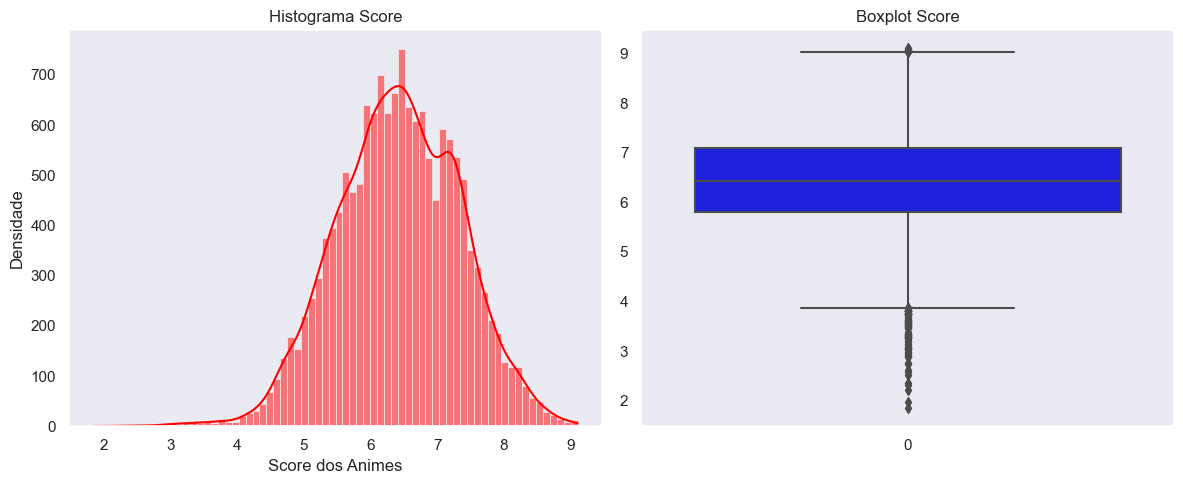

In [273]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#Histograma
sns.histplot(dados['score'], kde=True, color="red", ax=axes[0])
axes[0].set_title("Histograma Score")
axes[0].set_xlabel("Score dos Animes")
axes[0].set_ylabel("Densidade")

# Boxplot
sns.boxplot(dados['score'], color='blue', ax=axes[1])
axes[1].set_title("Boxplot Score")
plt.tight_layout()

plt.show()


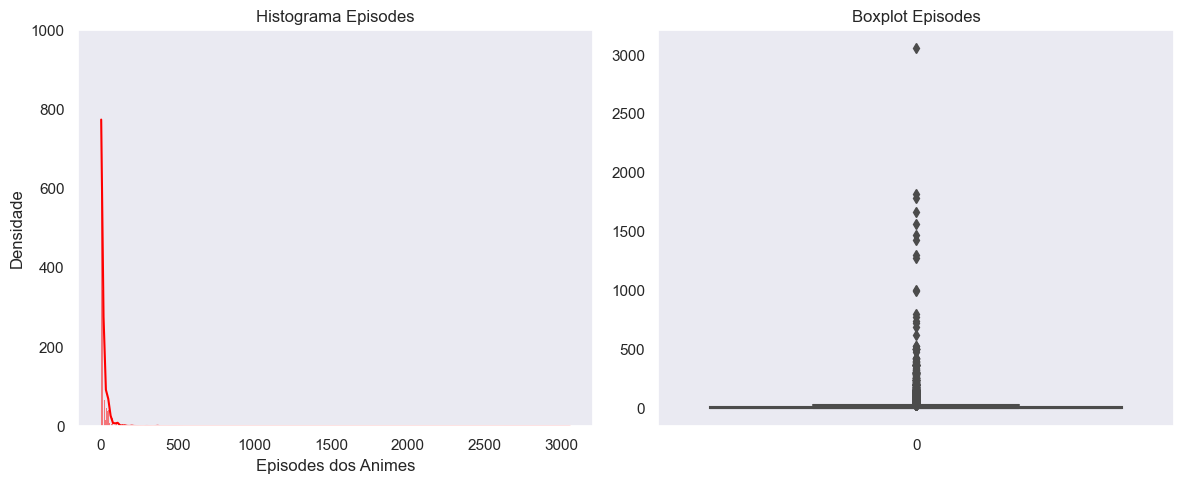

In [274]:
# Converter para tipo numérico (float)
dados['episodes'] = pd.to_numeric(dados['episodes'], errors='coerce')

# Criar os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histograma
sns.histplot(dados['episodes'], kde=True, color="red", ax=axes[0])
axes[0].set_ylim(0,1000)
axes[0].set_title("Histograma Episodes")
axes[0].set_xlabel("Episodes dos Animes")
axes[0].set_ylabel("Densidade")

# Boxplot
sns.boxplot(dados['episodes'], color='blue', ax=axes[1])
axes[1].set_title("Boxplot Episodes")

plt.tight_layout()
plt.show()

In [275]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['score', 'episodes']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(dados[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

score : Distribuição Não Normal
episodes : Distribuição Não Normal


Podemos observar que as variáveis "Score" e "Episodes" não seguem uma distribuição normal, o que indica que a escolha adequada para a imputação dos dados seria a moda ou a mediana. Já a variável "Rank" apresenta uma distribuição linear, o que nos permite fazer a imputação de forma crescente.

Portanto, para a variável "Score", optaremos por utilizar a moda ou mediana como estratégia para preencher os valores ausentes, mesma coisa para a variável 'Episodes'. Enquanto para a variável "Rank", faremos a imputação de forma crescente, considerando a ordem dos valores existentes para preencher os dados faltantes. Essas decisões são importantes para garantir a precisão das análises e interpretações dos resultados obtidos a partir dos dados disponíveis.

In [276]:
round(dados['score'].mean(),2)

6.42

In [277]:
round(dados['score'].median(),2)

6.42

In [278]:
dados['score'].mode()

0    6.51
Name: score, dtype: float64

In [279]:
# Verificar a quantidade de Outliers:

# Calcular o limite superior e inferior para identificar outliers
Q1 = dados['score'].quantile(0.25)
Q3 = dados['score'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificar os outliers na coluna 'streams'
outliers = dados[(dados['score'] < limite_inferior) | (dados['score'] > limite_superior)]

# Exibir a quantidade de outliers
quantidade_outliers = len(outliers)
print("Quantidade de outliers:", quantidade_outliers)

Quantidade de outliers: 92


Ao analisar os dados, podemos observar que os valores das medidas de tendência central, como a média, mediana e moda, são próximos entre si. Além disso, notamos que existem poucos outliers nos dados, e esses outliers são plausíveis considerando a natureza dos dados de anime e a votação popular, que pode variar significativamente de um anime para outro.

Diante dessa análise, concluímos que a melhor estratégia para a imputação dos valores ausentes na variável é utilizar a moda. A moda é uma medida robusta e menos sensível a outliers, o que a torna mais adequada para preencher os dados faltantes sem ser influenciada por valores extremos.

Portanto, vamos utilizar a moda como a nossa escolha para fazer a imputação dos valores ausentes na variável em questão. Isso nos permitirá obter resultados mais confiáveis e representativos para a análise dos dados de anime.

In [280]:
# Aplicando a imputação pela moda
dados['score'].fillna(6.51, inplace=True)

In [281]:
dados['score'].isnull().sum()

0

In [282]:
round(dados['episodes'].mean(),2)

15.26

In [283]:
round(dados['episodes'].median(),2)

2.0

In [284]:
dados['episodes'].mode()

0    1.0
Name: episodes, dtype: float64

In [285]:
# Verificar a quantidade de Outliers:

# Calcular o limite superior e inferior para identificar outliers
Q1 = dados['episodes'].quantile(0.25)
Q3 = dados['episodes'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificar os outliers na coluna 'streams'
outliers = dados[(dados['episodes'] < limite_inferior) | (dados['episodes'] > limite_superior)]

# Exibir a quantidade de outliers
quantidade_outliers = len(outliers)
print("Quantidade de outliers:", quantidade_outliers)

Quantidade de outliers: 2860


Como os dados não seguem uma distribuição normal e levando em conta a quantidade de outliers, devemos utilizar a moda

In [286]:
dados['episodes'].fillna(1.0, inplace=True)

In [287]:
dados['episodes'].isnull().sum()

0

In [288]:
# Identificar os valores ausentes na coluna "rank"
valores_ausentes = dados['rank'].isnull()

# Criar uma lista com os valores que faltam
valores_imputacao = list(range(1, valores_ausentes.sum() + 1))

# Preencher os valores ausentes
dados.loc[valores_ausentes, 'rank'] = valores_imputacao

In [289]:
dados['rank'].isnull().sum()

0

In [290]:
dados.head()

,Unnamed: 0,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,0,Fullmetal Alchemist: Brotherhood,64.0,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,3,1,9.10,3190961,After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24,Spring 2009,Bones
1,1,Steins;Gate,24.0,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,13,2,9.07,2452142,Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24,Spring 2011,White Fox
2,2,Bleach: Sennen Kessen-hen,13.0,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,458,3,9.06,455428,Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24,Fall 2022,Pierrot
3,3,Gintama°,51.0,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,332,4,9.06,599235,"Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24,Spring 2015,Bandai Namco Pictures
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13.0,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,193,5,9.05,832346,The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23,Spring 2022,A-1 Pictures


In [291]:
dados.dtypes

Unnamed: 0       int64
title           object
episodes       float64
status          object
theme           object
demographic     object
genres          object
type            object
favorites       object
popularity      object
rank            object
score          float64
members         object
synopsis        object
aired           object
duration         int64
premiered       object
studios         object
dtype: object

#### Mudando tipo de Variáveis

In [292]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24262 entries, 0 to 24261
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   24262 non-null  int64  
 1   title        24262 non-null  object 
 2   episodes     24262 non-null  float64
 3   status       24262 non-null  object 
 4   theme        24262 non-null  object 
 5   demographic  24262 non-null  object 
 6   genres       24262 non-null  object 
 7   type         24262 non-null  object 
 8   favorites    24262 non-null  object 
 9   popularity   24262 non-null  object 
 10  rank         24262 non-null  object 
 11  score        24262 non-null  float64
 12  members      24262 non-null  object 
 13  synopsis     24262 non-null  object 
 14  aired        24262 non-null  object 
 15  duration     24262 non-null  int64  
 16  premiered    24262 non-null  object 
 17  studios      24262 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory usa

Algumas variáveis foram erroneamente descritas como string (object64), mas na verdade não são. Realizaremos a devida conversão dessas variáveis, uma vez que identificamos que o conjunto de dados pode conter informações de texto, como "unkanow", que podem ter influenciado na interpretação dos tipos de dados. Vamos proceder com a correção para garantir a precisão das análises.

In [293]:
# episodes
dados["episodes"] = pd.to_numeric(dados["episodes"], errors='coerce').astype('Int64')

In [294]:
#Dados Faltantes
dados['episodes'].isnull().mean()*100

0.0

In [295]:
#Favorites
dados["favorites"] = pd.to_numeric(dados["favorites"], errors='coerce').astype('Int64')

In [296]:
dados['favorites'].isnull().sum()

0

In [297]:
#popularity
dados["popularity"] = pd.to_numeric(dados["popularity"], errors='coerce').astype('Int64')

In [298]:
dados['popularity'].isnull().sum()

0

In [299]:
#rank
dados["rank"] = pd.to_numeric(dados["rank"], errors='coerce').astype('Int64')

In [300]:
dados['rank'].isnull().sum()

0

In [301]:
#members
dados["members"] = pd.to_numeric(dados["members"], errors='coerce').astype('Int64')

In [302]:
dados['members'].isnull().sum()

0

In [303]:
#duration 
dados["duration"] = pd.to_numeric(dados["duration"], errors='coerce').astype('Int64')

In [304]:
dados['duration'].isnull().sum()

0

In [305]:
dados.dtypes

Unnamed: 0       int64
title           object
episodes         Int64
status          object
theme           object
demographic     object
genres          object
type            object
favorites        Int64
popularity       Int64
rank             Int64
score          float64
members          Int64
synopsis        object
aired           object
duration         Int64
premiered       object
studios         object
dtype: object

In [306]:
dados.drop(columns='Unnamed: 0', inplace=True)

#### Análise Descritiva dos Dados

In [307]:
dados.describe()

,episodes,favorites,popularity,rank,score,members,duration
count,24262.0,24262.0,24262.0,24262.0,24262.000000,24262.0,24262.0
mean,14.951529,446.694007,12468.341645,8747.592655,6.451452,38325.441884,21.349765
std,48.63503,4429.920807,7241.184118,6132.236053,0.731429,159697.401664,24.601638
min,1.0,0.0,1.0,1.0,1.850000,6.0,0.0
25%,1.0,0.0,6095.25,3033.25,6.180000,211.0,4.0
50%,2.0,1.0,12616.0,8066.5,6.510000,1028.5,15.0
75%,13.0,19.0,18771.75,14131.75,6.670000,9961.0,25.0
max,3057.0,218277.0,24852.0,20197.0,9.100000,3762148.0,168.0


Esses são os resultados da análise descritiva:

episodes: A coluna "episodes" possui 24.262 registros. A média de episódios é aproximadamente 14,95, com um mínimo de 1 e máximo de 3.057 episódios. A dispersão dos dados é alta, com um desvio padrão de cerca de 48,63 episódios.

favorites: A coluna "favorites" também possui 24.262 registros. A média de favoritos é de aproximadamente 446,69, com um mínimo de 0 e máximo de 218.277. Os dados têm alta dispersão, com um desvio padrão de aproximadamente 4.429,92.

popularity: A coluna "popularity" possui 24.262 registros. A média de popularidade é de aproximadamente 12.468,34, com um mínimo de 1 e máximo de 24.852. Os dados têm alta dispersão, com um desvio padrão de aproximadamente 7.241,18.

score: A coluna "score" possui 15.294 registros (menos que as outras colunas). A média de score é de aproximadamente 6,42, com um mínimo de 1,85 e máximo de 9,1. Os dados têm baixa dispersão, com um desvio padrão de aproximadamente 0,92.

members: A coluna "members" possui 24.262 registros. A média de membros é de aproximadamente 38.325,44, com um mínimo de 6 e máximo de 3.762.148. Os dados têm alta dispersão, com um desvio padrão de aproximadamente 159.697,40.

duration: A coluna "duration" possui 24.262 registros. A média da duração é de aproximadamente 21,35 minutos, com um mínimo de 0 e máximo de 168 minutos. Os dados têm alta dispersão, com um desvio padrão de aproximadamente 24,60 minutos.

In [308]:
dados.head()

,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,3,1,9.10,3190961,After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24,Spring 2009,Bones
1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,13,2,9.07,2452142,Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24,Spring 2011,White Fox
2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,458,3,9.06,455428,Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24,Fall 2022,Pierrot
3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,332,4,9.06,599235,"Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24,Spring 2015,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,193,5,9.05,832346,The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23,Spring 2022,A-1 Pictures


### Maiores Scores de Animes

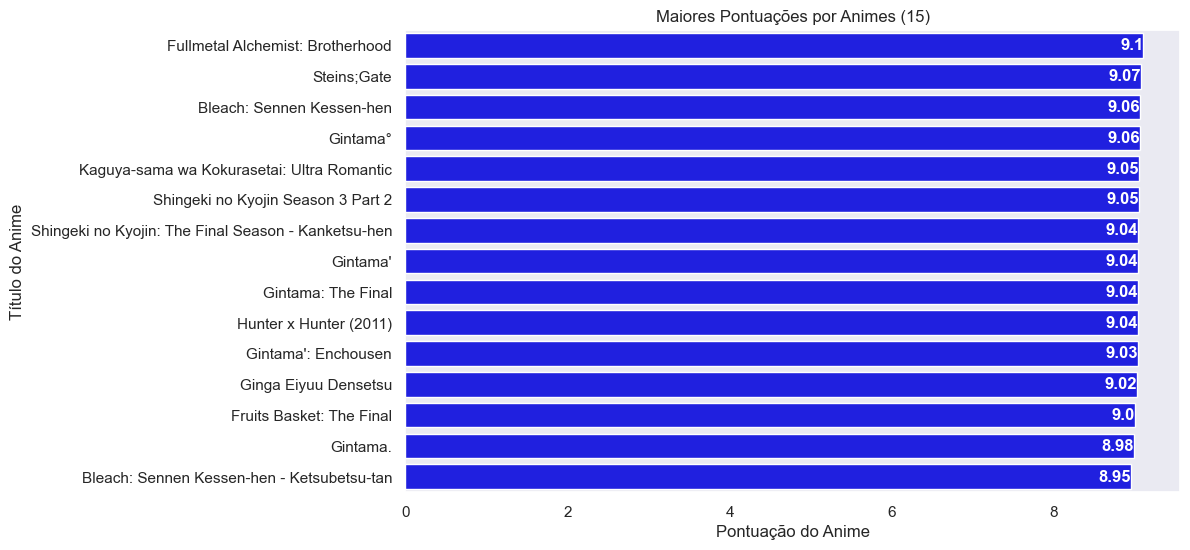

In [309]:
dados_Animes = dados.head(15)

# Definir o tamanho da figura

plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
sns.barplot(data=dados_Animes, x='score', y='title', orient='h', color='blue')

plt.title("Maiores Pontuações por Animes (15)")
plt.xlabel("Pontuação do Anime")
plt.ylabel("Título do Anime")

# Adicionar rótulos de dados
for index, value in enumerate(dados_Animes['score']):
    plt.text(value, index, str(value), ha='right', va='center', color='White', fontweight='bold')

plt.show()


Podemos observar que o anime com a maior pontuação é "Fullmetal Alchemist Brotherhood". Além disso, notamos que a diferença de pontuação entre os primeiros colocados é pequena. Por outro lado, é possível perceber que existem diferenças sutis na nomenclatura do anime "Gintama", como "Gintama." e "Gintama'". Essas diferenças podem estar relacionadas a variações no número de episódios e nas pontuações, conforme verificado no site MyAnimeList.

#### Animes mais Populares

In [353]:
dados1 = dados[['title', 'popularity']]
dados1.rename(columns={'title': 'Nome', 'popularity': 'Popularidade'}, inplace=True)
dados1 = dados1.sort_values(by='Popularidade', ascending=True)
dados1 = dados1.head(10)

# Remover a indexação anterior e redefinir a indexação sequencial
dados1.reset_index(drop=True, inplace=True)

dados1

,Nome,Popularidade
0,Shingeki no Kyojin,1
1,Death Note,2
2,Fullmetal Alchemist: Brotherhood,3
3,One Punch Man,4
4,Sword Art Online,5
5,Boku no Hero Academia,6
6,Kimetsu no Yaiba,7
7,Naruto,8
8,Tokyo Ghoul,9
9,Hunter x Hunter (2011),10


### Animes mais favoritados

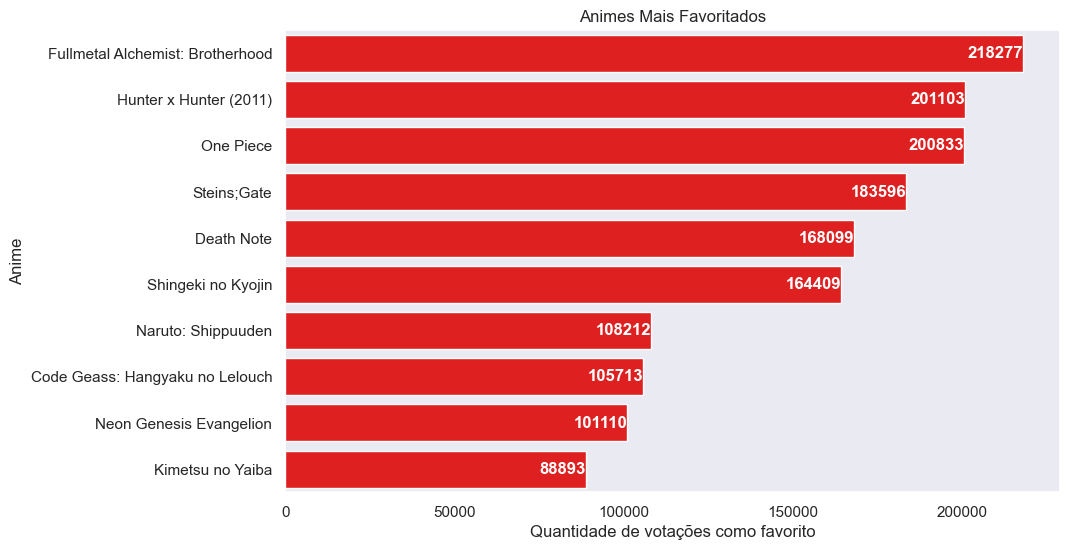

In [311]:
dados2 = dados.sort_values(by='favorites', ascending=False)
dados2 = dados2.head(10)
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

sns.barplot(data=dados2, x='favorites', y = 'title', color='red', orient='h')
plt.title("Animes Mais Favoritados")
plt.xlabel("Quantidade de votações como favorito")
plt.ylabel("Anime")
# Adicionar rótulos de dados
for index, value in enumerate(dados2['favorites']):
    plt.text(value, index, str(value), ha='right', va='center', color='White', fontweight='bold')

### Animes com mais Membros no Site

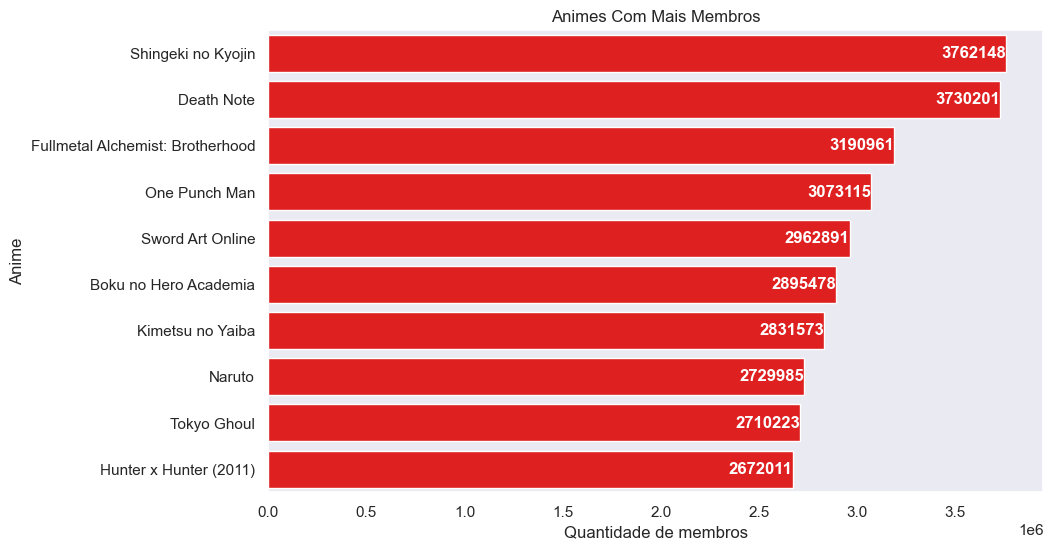

In [312]:
dados3 = dados.sort_values(by='members', ascending=False)
dados3 = dados3.head(10)

# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

sns.barplot(data=dados3, x='members', y='title', color='red', orient='h')
plt.title("Animes Com Mais Membros")
plt.xlabel("Quantidade de membros")
plt.ylabel("Anime")

# Adicionar rótulos de dados
for index, value in enumerate(dados3['members']):
    plt.text(value, index, str(value), ha='right', va='center', color='White', fontweight='bold')

plt.show()


### Média de Score de Anime por demographic

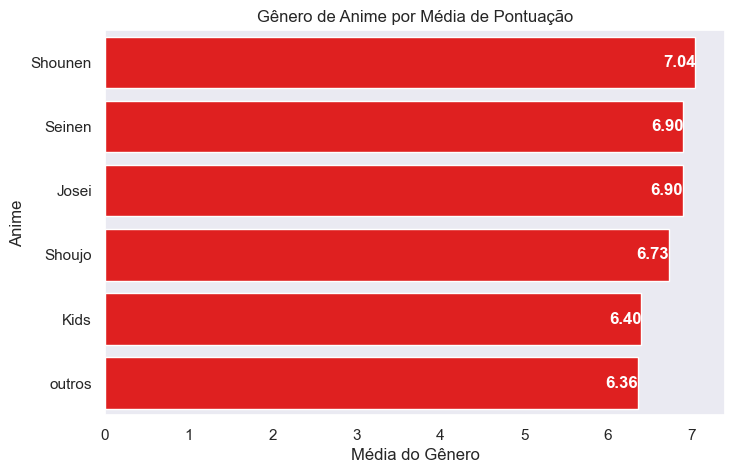

In [340]:
dados4 = dados.groupby('demographic')['score'].mean().reset_index()
dados4 = dados4.sort_values(by='score', ascending=False)

plt.figure(figsize=(8, 5))

sns.barplot(data=dados4, x='score', y = 'demographic', color='red', orient='h')
plt.title("Gênero de Anime por Média de Pontuação")
plt.xlabel("Média do Gênero")
plt.ylabel("Anime")
# Adicionar rótulos de dados
for index, value in enumerate(dados4['score']):
    plt.text(value, index, f'{value:.2f}', ha='right', va='center', color='white', fontweight='bold')

plt.show()

In [342]:
dados.dtypes

title           object
episodes         Int64
status          object
theme           object
demographic     object
genres          object
type            object
favorites        Int64
popularity       Int64
rank             Int64
score          float64
members          Int64
synopsis        object
aired           object
duration         Int64
premiered       object
studios         object
dtype: object

In [343]:
dados['theme'].unique()

array(['Military', 'Unknown', 'School', 'Romantic Subtext', 'Vampire',
       'Super Power', 'Historical', 'Mythology', 'Combat Sports',
       'Anthropomorphic', 'Mecha', 'Childcare', 'Gore', 'Organized Crime',
       'Time Travel', 'Otaku Culture', 'CGDCT', 'Iyashikei',
       'Martial Arts', 'Adult Cast', 'Visual Arts', 'Team Sports',
       'Racing', 'Detective', 'Music', 'Psychological', 'Survival',
       'Mahou Shoujo', 'Isekai', 'Performing Arts', 'Video Game',
       'Showbiz', 'Workplace', 'Delinquents', 'Love Polygon',
       'Strategy Game', 'Space', 'Parody', 'Idols (Female)', 'Gag Humor',
       'Reverse Harem', 'Pets', 'Harem', 'Magical Sex Shift', 'Medical',
       'Crossdressing', 'Reincarnation', 'Idols (Male)', 'Samurai',
       'Educational', 'High Stakes Game'], dtype=object)